# Vegetation Index Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
vi_Folder = "C:/Users/cenwe/Downloads/Programming/Python/vegetation_index/"
vi_list = []

#NDVI from 2000/02/01 - 2014/12/31
for y in range(2, 10):
    vi_list.append(xr.open_dataset(vi_Folder + "MODVI.20000" + str(y) + ".005.hdf").NDVI)
for y in range(10, 13):
    vi_list.append(xr.open_dataset(vi_Folder + "MODVI.2000" + str(y) + ".005.hdf").NDVI)
for x in range(1, 10):
    for y in range(1, 10):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.200" + str(x) + "0" + str(y) + ".005.hdf").NDVI)
    for y in range(10, 13):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.200" + str(x) + str(y) + ".005.hdf").NDVI) 
for x in range(10, 15):
    for y in range(1, 10):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.20" + str(x) + "0" + str(y) + ".005.hdf").NDVI)
    for y in range(10, 13):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.20" + str(x) + str(y) + ".005.hdf").NDVI)

0.0000243


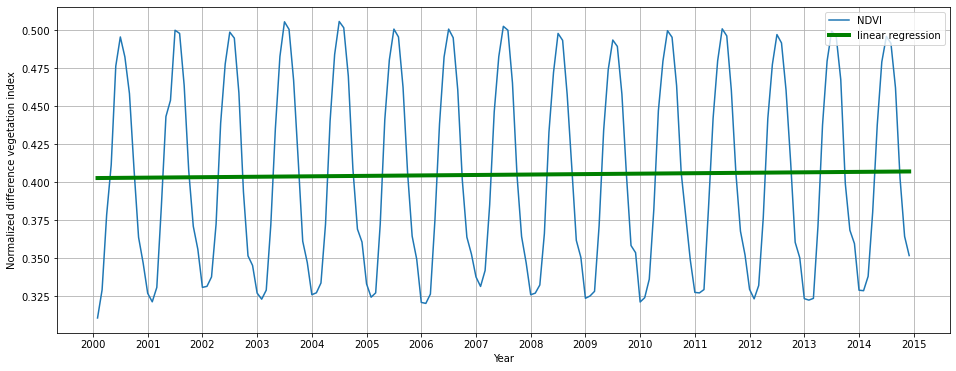

In [32]:
globalVIArray = []
start = 0
end = 179
for i in vi_list:
    globalVIArray.append(i.where(i >= 0).mean())
    
m, b = np.polyfit(np.arange(start, end, 1), globalVIArray[start:end], 1)

plt.figure(figsize=(16,6))    
plt.plot(np.arange(1, 180, 1), globalVIArray, label='NDVI');
plt.plot(np.arange(start + 1, end + 1, 1),
         m*np.arange(start, end, 1) + b,
         linewidth=4,
         label='linear regression',
         color='green')
print(f"{m:.7f}")
plt.grid(True)
plt.ylabel('Normalized difference vegetation index')
plt.xlabel('Year')
plt.xticks(np.arange(0, len(globalVIArray)+12, 12), ['2000', '2001', '2002', '2003', '2004', '2005',
                                                      '2006', '2007', '2008','2009', '2010', '2011',
                                                      '2012', '2013', '2014', '2015']);
plt.legend(loc=1);

### Regional

-0.00296


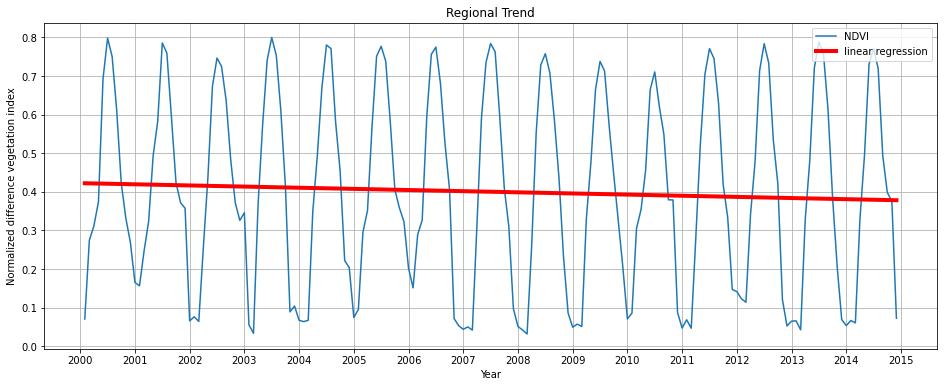

In [31]:
monthlyVIArray = []
start = 0
end = 179
for i in vi_list:
    target_region = i[34:35, 62:63]
    monthlyVIArray.append(target_region.where(target_region >= 0).mean())
m, b = np.polyfit(np.arange(start, end, 1), monthlyVIArray[start:end], 1)
if m >= 0: regressionColor = 'green'
else: regressionColor = 'red'
plt.figure(figsize=(16,6))    
plt.plot(np.arange(1, 180, 1), monthlyVIArray, label='NDVI');
plt.plot(np.arange(start + 1, end + 1, 1), 
         m*np.arange(start, end, 1) + b,
         linewidth=4,
         label='linear regression',
         color=regressionColor)
print(f"{m*12:.5f}")
plt.grid(True)
plt.title('Regional Trend')
plt.ylabel('Normalized difference vegetation index')
plt.xlabel('Year')
plt.xticks(np.arange(0, len(monthlyVIArray)+12, 12), ['2000', '2001', '2002', '2003', '2004', '2005',
                                                      '2006', '2007', '2008','2009', '2010', '2011',
                                                      '2012', '2013', '2014', '2015']);
plt.legend(loc=1);
#plt.savefig('testgraph.png', dpi=300)

### Coordinate-Specific

In [7]:
def convertCoordinateStr(inputCoord):
    outputCoord = inputCoord.replace("° ", "")
    outputCoord = outputCoord.replace(", ", "")
    
    if outputCoord.find("N") != -1:
        latdirIndex = outputCoord.find("N")
        outputlat = int(round(90 - float(outputCoord[:latdirIndex]), 0))
        if outputCoord.find("E") != -1:
            outputlon = int(round(180 + float(outputCoord[latdirIndex+1:outputCoord.find("E")]), 0))
        else:
            outputlon = int(round(180 - float(outputCoord[latdirIndex+1:outputCoord.find("W")]), 0))
    else:
        latdirIndex = outputCoord.find("S")
        outputlat = int(round(90 + float(outputCoord[:latdirIndex]), 0))
        if outputCoord.find("E") != -1:
            outputlon = int(round(180 + float(outputCoord[latdirIndex+1:outputCoord.find("E")]), 0))
        else:
            outputlon = int(round(180 - float(outputCoord[latdirIndex+1:outputCoord.find("W")]), 0))
    
    return outputlat, outputlon

0.00509


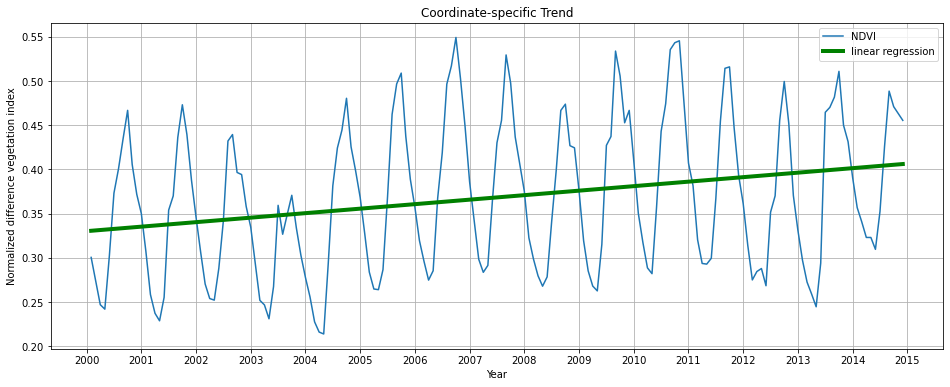

In [34]:
coordinateVIArray = []
start = 0
end = 179
lat, lon = convertCoordinateStr("18.8206° N, 73.9596° E")

for i in vi_list:
    target_region = i[lat:lat+1, lon:lon+1]
    coordinateVIArray.append(target_region.where(target_region >= 0).mean())
try:
    m, b = np.polyfit(np.arange(start, end, 1), coordinateVIArray[start:end], 1)
except:
    print("Incomplete Data")
if m >= 0: regressionColor = 'green'
else: regressionColor = 'red'
plt.figure(figsize=(16,6))    
plt.plot(np.arange(1, 180, 1), coordinateVIArray, label='NDVI');
plt.plot(np.arange(start + 1, end + 1, 1), 
         m*np.arange(start, end, 1) + b,
         linewidth=4,
         label='linear regression',
         color=regressionColor)
print(f"{m*12:.5f}")
plt.grid(True)
plt.title('Coordinate-specific Trend')
plt.ylabel('Normalized difference vegetation index')
plt.xlabel('Year')
plt.xticks(np.arange(0, len(coordinateVIArray)+12, 12), ['2000', '2001', '2002', '2003', '2004', '2005',
                                                      '2006', '2007', '2008','2009', '2010', '2011',
                                                      '2012', '2013', '2014', '2015']);
plt.legend(loc=1);

---
### Global Map

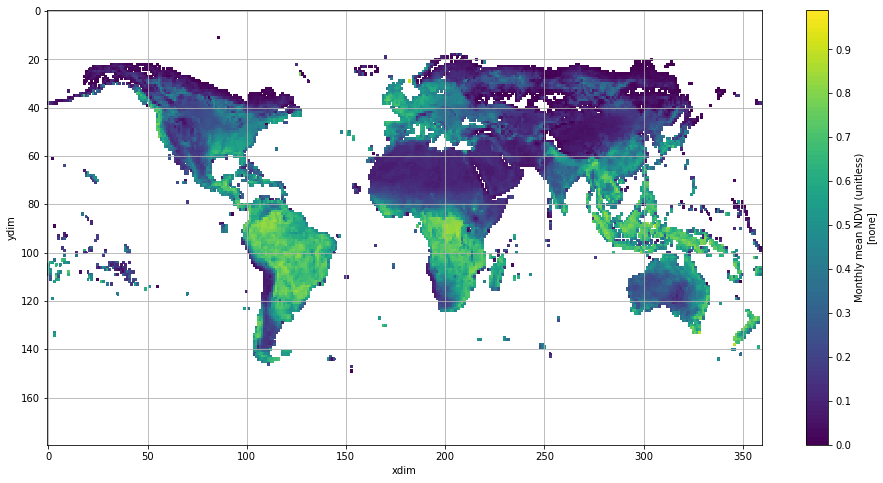

In [9]:
time = 1

v_index = vi_list[time].where(vi_list[time] >= 0)
v_index.plot(figsize=(16,8),
             robust=True,
             levels=np.arange(0, 1, 0.01));
plt.gca().invert_yaxis()
plt.grid(True)